# UK Historic Electricity Demand - Data Cleaning and EDA
**Author:** Abdul Salam Aldabik

In [1]:
# !pip install requests
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv('../Data/neso_historic_demand_combined.csv')

C:\Users\abdul\AppData\Local\Temp\ipykernel_26460\85028702.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/neso_historic_demand_combined.csv')


# exploring

In [3]:
# 1. Basic info and preview
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435408 entries, 0 to 435407
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   settlement_date            262992 non-null  object 
 1   settlement_period          435408 non-null  int64  
 2   nd                         435408 non-null  int64  
 3   tsd                        365280 non-null  float64
 4   england_wales_demand       435408 non-null  int64  
 5   embedded_wind_generation   330240 non-null  float64
 6   embedded_wind_capacity     330240 non-null  float64
 7   embedded_solar_generation  295152 non-null  float64
 8   embedded_solar_capacity    295152 non-null  float64
 9   non_bm_stor                435408 non-null  int64  
 10  pump_storage_pumping       435408 non-null  int64  
 11  ifa_flow                   435408 non-null  int64  
 12  ifa2_flow                  295152 non-null  float64
 13  britned_flow               29

In [4]:
print(df.head())

  settlement_date  settlement_period     nd      tsd  england_wales_demand  \
0      2009-01-01                  1  37910  38704.0                 33939   
1      2009-01-01                  2  38047  38964.0                 34072   
2      2009-01-01                  3  37380  38651.0                 33615   
3      2009-01-01                  4  36426  37775.0                 32526   
4      2009-01-01                  5  35687  37298.0                 31877   

   embedded_wind_generation  embedded_wind_capacity  \
0                      54.0                  1403.0   
1                      53.0                  1403.0   
2                      53.0                  1403.0   
3                      50.0                  1403.0   
4                      50.0                  1403.0   

   embedded_solar_generation  embedded_solar_capacity  non_bm_stor  ...  \
0                        0.0                      0.0            0  ...   
1                        0.0                      

In [5]:
# 3. Summarize missing values
missing_count = df.isnull().sum()
print("Missing values per column:\n", missing_count)

Missing values per column:
 settlement_date              172416
settlement_period                 0
nd                                0
tsd                           70128
england_wales_demand              0
embedded_wind_generation     105168
embedded_wind_capacity       105168
embedded_solar_generation    140256
embedded_solar_capacity      140256
non_bm_stor                       0
pump_storage_pumping              0
ifa_flow                          0
ifa2_flow                    140256
britned_flow                 140256
moyle_flow                    70128
east_west_flow               140256
nemo_flow                    140256
nsl_flow                     315552
eleclink_flow                315552
viking_flow                  315552
greenlink_flow               315552
scottish_transfer            385680
dtype: int64


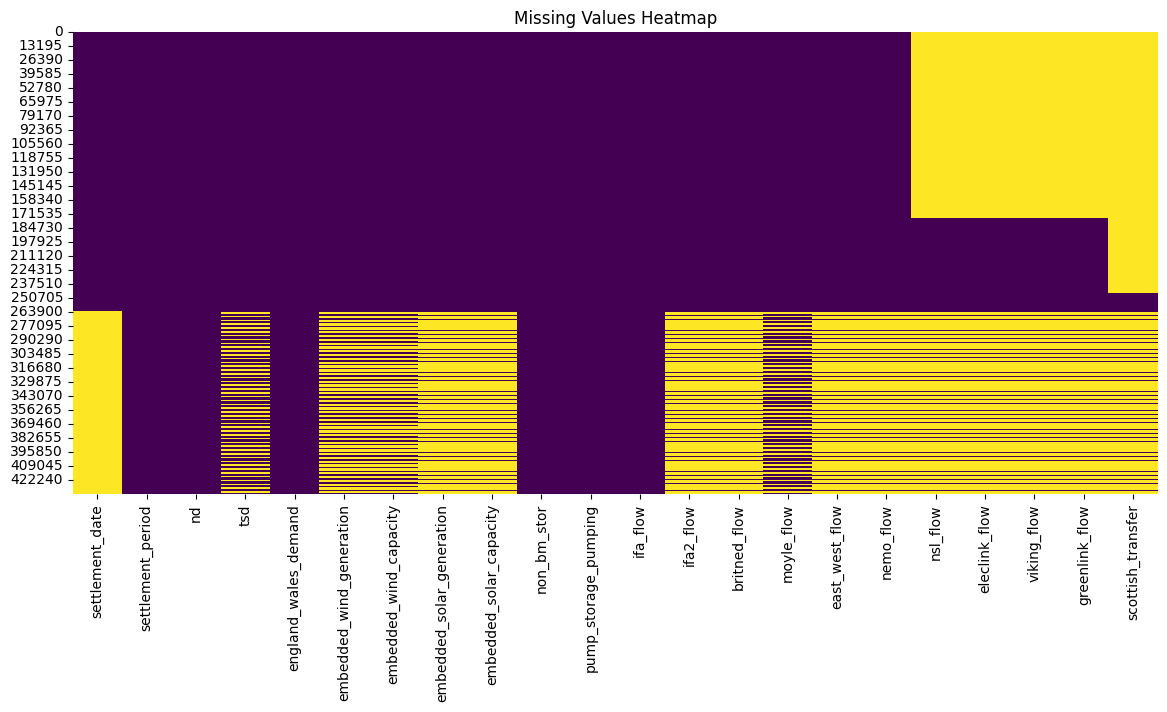

In [6]:

# 4. Visualize missing data heatmap
plt.figure(figsize=(14,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [7]:

# 5. Separate columns by type
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print(f"Numerical columns: {list(num_cols)}")
print(f"Categorical columns: {list(cat_cols)}")

Numerical columns: ['settlement_period', 'nd', 'tsd', 'england_wales_demand', 'embedded_wind_generation', 'embedded_wind_capacity', 'embedded_solar_generation', 'embedded_solar_capacity', 'non_bm_stor', 'pump_storage_pumping', 'ifa_flow', 'ifa2_flow', 'britned_flow', 'moyle_flow', 'east_west_flow', 'nemo_flow', 'nsl_flow', 'eleclink_flow', 'viking_flow', 'greenlink_flow', 'scottish_transfer']
Categorical columns: ['settlement_date']


In [8]:
# 6. Summary stats for numerical columns
print(df[num_cols].describe())

       settlement_period             nd            tsd  england_wales_demand  \
count      435408.000000  435408.000000  365280.000000         435408.000000   
mean           24.500230   33334.284875   33250.519963          30258.034795   
std            13.853813    8520.203649    8832.251991           7676.395364   
min             1.000000   12803.000000       0.000000              0.000000   
25%            12.750000   26470.000000   27059.000000          24047.000000   
50%            24.500000   32946.000000   32709.000000          29879.500000   
75%            36.250000   39669.000000   39414.000000          35991.250000   
max            50.000000   60333.000000   60560.000000          54430.000000   

       embedded_wind_generation  embedded_wind_capacity  \
count             330240.000000           330240.000000   
mean                1218.685656             4155.343556   
std                 1049.620867             2212.296797   
min                    0.000000            

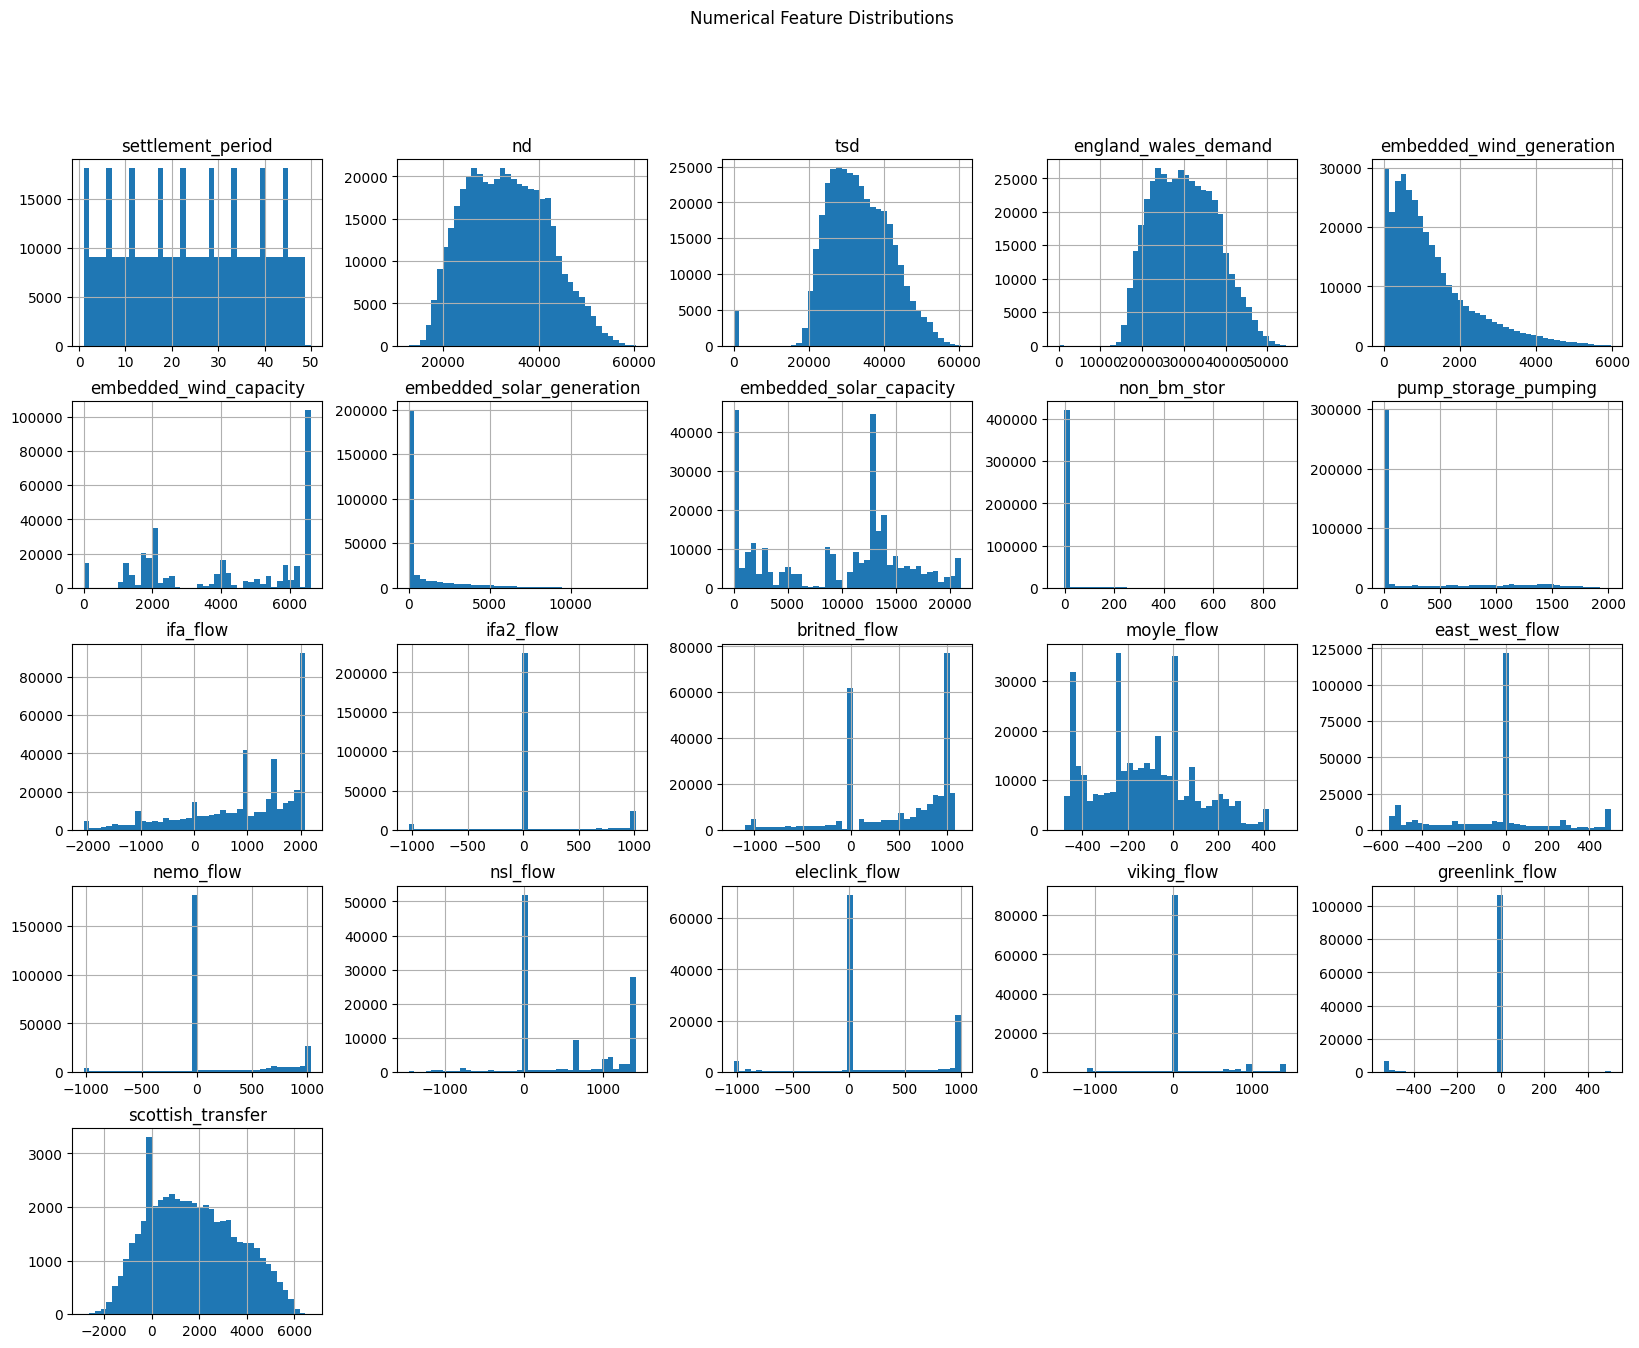

In [9]:
# 7. Histograms for numerical distributions
df[num_cols].hist(bins=40, figsize=(20,15))
plt.suptitle("Numerical Feature Distributions")
plt.show()

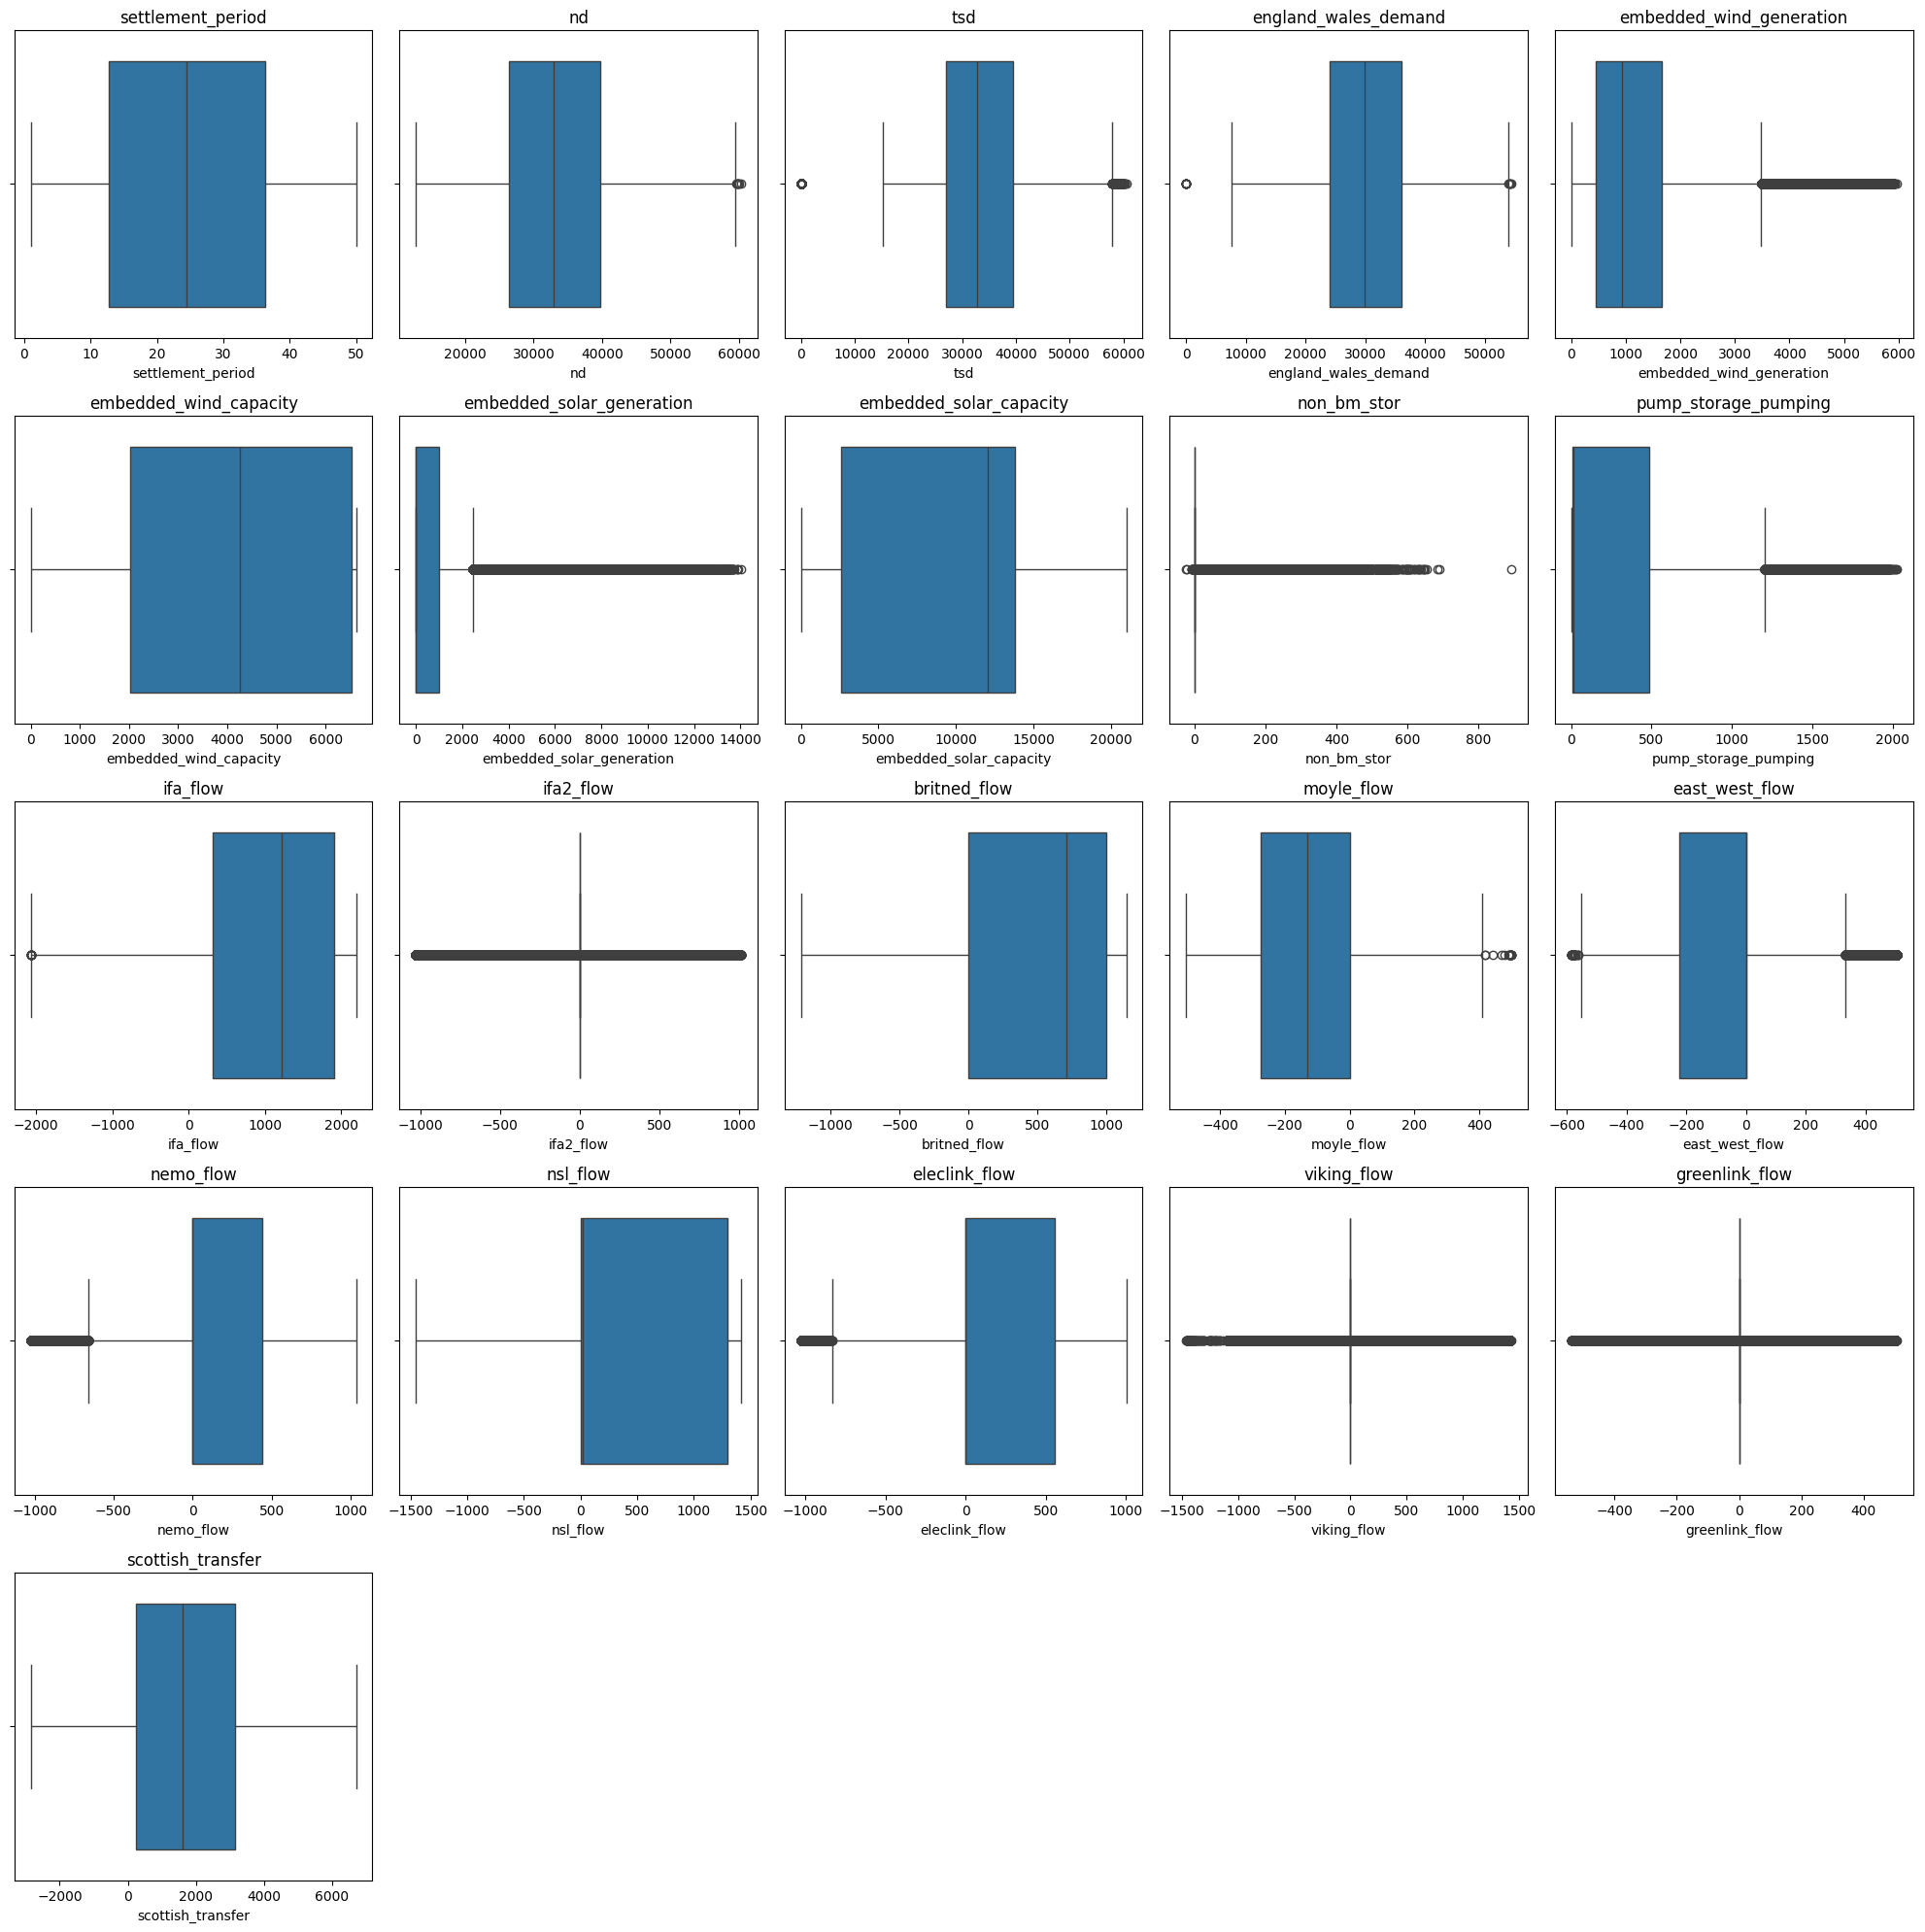

In [10]:
# 8. Boxplots to detect outliers
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_plots = len(num_cols)

ncols = 5
nrows = math.ceil(num_plots / ncols)

plt.figure(figsize=(ncols * 4, nrows * 4))

for i, col in enumerate(num_cols):
    data = df[col].dropna()  # Drop NaNs for plotting
    # Skip columns if empty after dropping NaNs or if constant
    if data.empty or data.nunique() <= 1:
        continue  # Skip plotting this column
    
    plt.subplot(nrows, ncols, i + 1)
    sns.boxplot(x=data)
    plt.title(col)

plt.tight_layout()
plt.show()

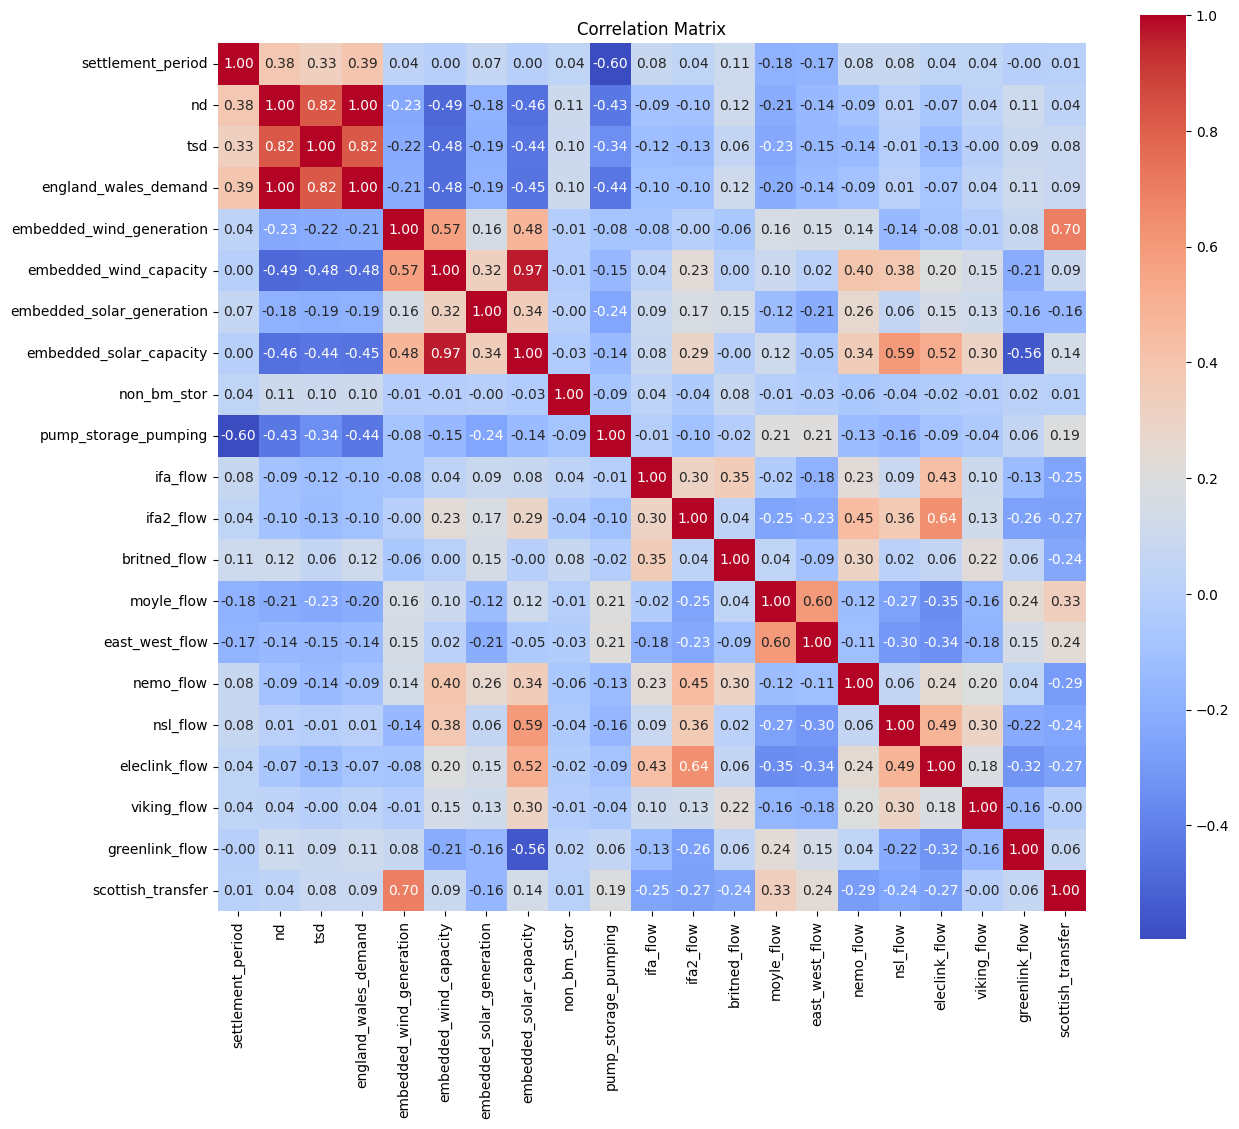

In [11]:
# 9. Correlation matrix among numerical features
plt.figure(figsize=(14,12))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# cleaning

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# === 2. Drop Redundant & Near-Empty Columns ===
# ND, TSD, ENGLAND_WALES_DEMAND are nearly perfectly correlated—keep just one.
# Also drop columns with very high missingness and those with only one unique value (constants).
# IMPORTANT: Protect settlement_date and settlement_period (needed for time series analysis per CloudAI Chapter 6)

redundant = ['nd', 'tsd']  # Keep england_wales_demand as primary demand metric
near_empty = ['nsl_flow', 'eleclink_flow', 'viking_flow', 'greenlink_flow', 'scottish_transfer']

# Find constant columns but EXCLUDE settlement_date and settlement_period
constant_cols = [col for col in df.columns 
                 if df[col].nunique(dropna=True) <= 1 
                 and col.lower() not in ['settlement_date', 'settlement_period']]

cols_to_drop = list(set(redundant + near_empty + constant_cols))
df = df.drop(columns=cols_to_drop)
print(f"Dropped columns: {cols_to_drop}")
print(f"Remaining columns: {len(df.columns)}")


Dropped columns: ['viking_flow', 'greenlink_flow', 'nd', 'tsd', 'eleclink_flow', 'scottish_transfer', 'nsl_flow']
Remaining columns: 15


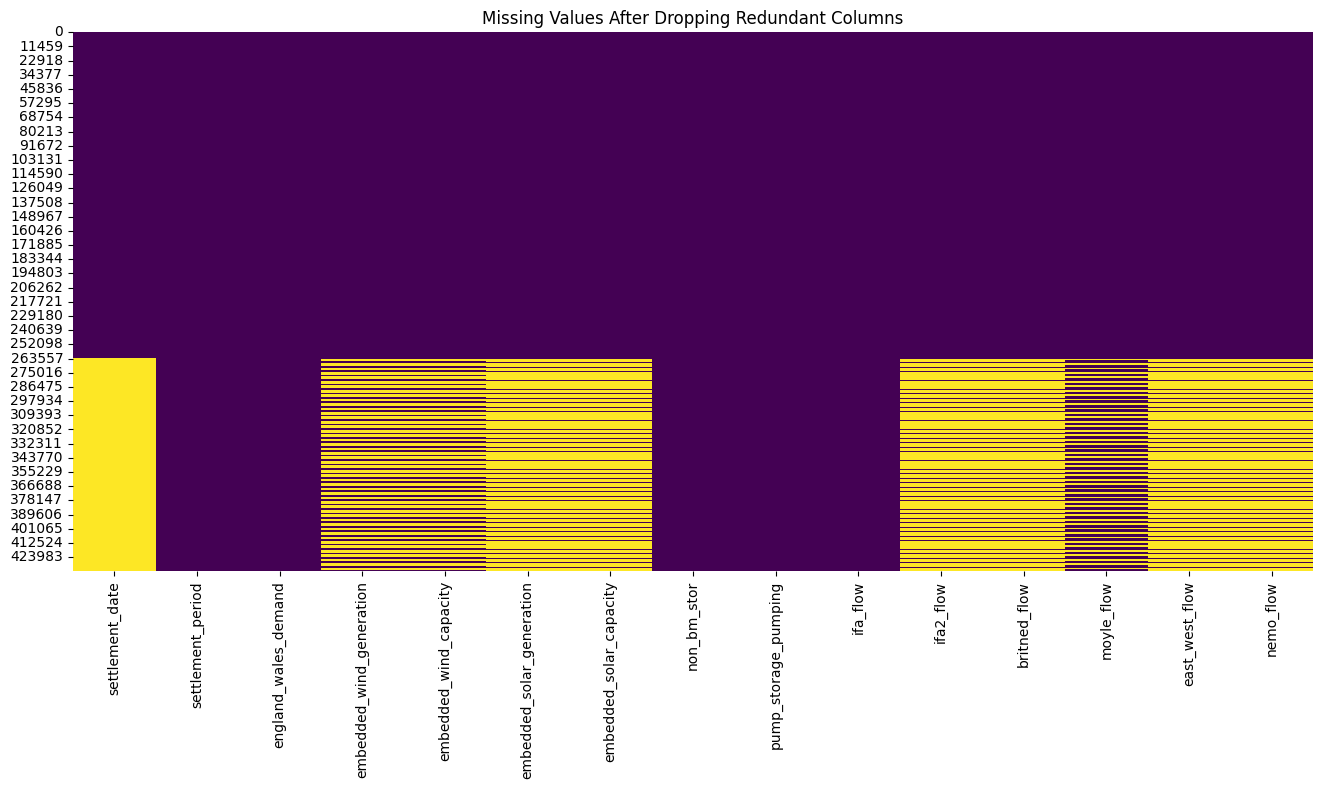

In [14]:
# Visualize missing values after dropping columns
plt.figure(figsize=(16, 7))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values After Dropping Redundant Columns')
plt.show()

In [15]:
# === 3. Drop Columns with >50% Missing Values ===
# IMPORTANT: Protect settlement_date even if >50% missing (needed for time series per CloudAI Ch 6)
missing_pct = df.isnull().mean()
high_missing_cols = [col for col in missing_pct[missing_pct > 0.5].index 
                     if col.lower() not in ['settlement_date', 'settlement_period']]

df = df.drop(columns=high_missing_cols)
print(f"Dropped high-missing columns (>50% null): {high_missing_cols}")
print(f"Remaining columns: {len(df.columns)}")


Dropped high-missing columns (>50% null): []
Remaining columns: 15


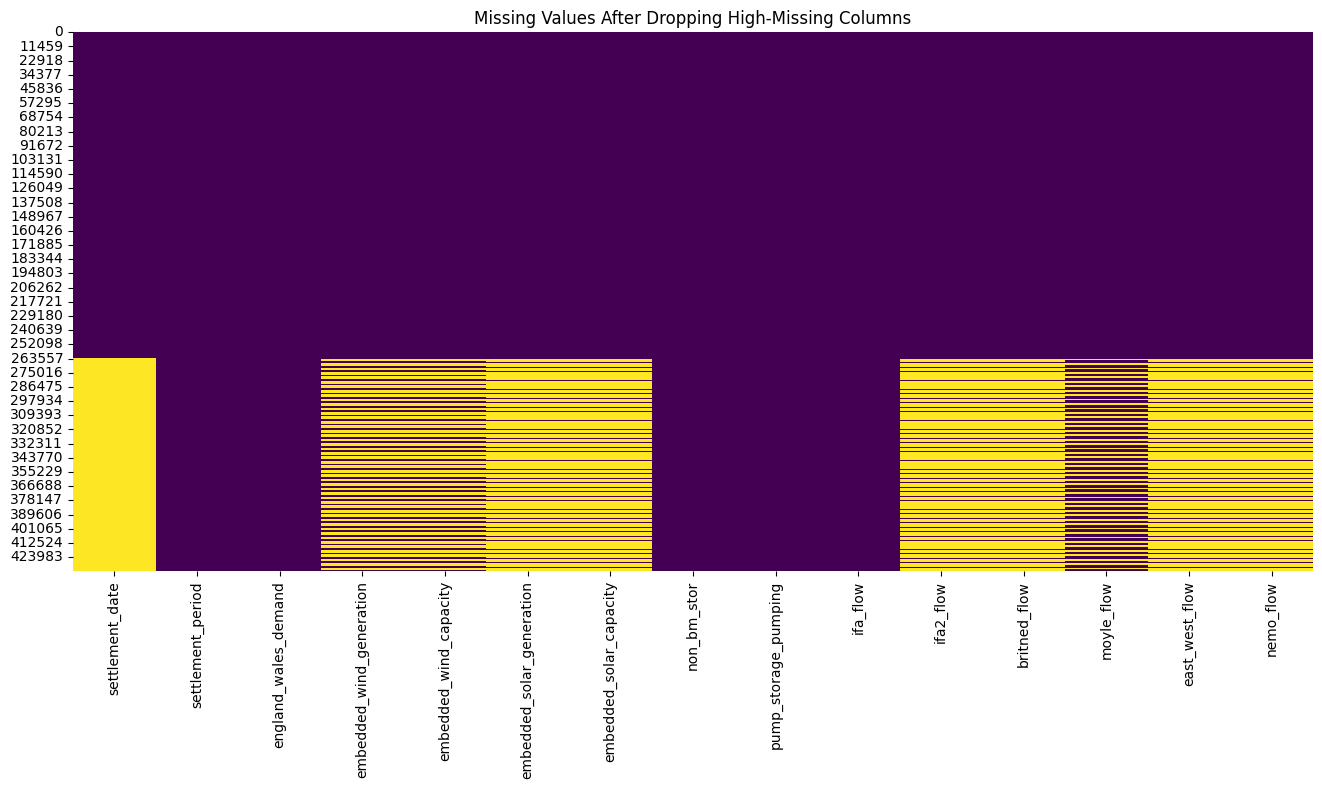

In [16]:
# Visualize again to confirm progress
plt.figure(figsize=(16, 7))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values After Dropping High-Missing Columns')
plt.show()

In [17]:
# === 4. Handle Missing Settlement Dates & Fill Remaining Missing Values ===
# CRITICAL FIX: settlement_date missing values CANNOT be filled/fabricated
# Per CloudAI Chapter 6: Time series requires continuous, verified dates
# Solution: DROP rows with missing settlement_date (cannot recover temporal information)

# First, check and drop rows with missing settlement_date
if 'settlement_date' in df.columns:
    missing_dates_before = df['settlement_date'].isna().sum()
    if missing_dates_before > 0:
        print(f"⚠️  Found {missing_dates_before:,} rows with missing settlement_date ({missing_dates_before/len(df)*100:.2f}%)")
        print(f"   Dropping these rows (CloudAI Ch 6: Don't fabricate temporal data)")
        
        # Drop rows with missing dates
        df = df.dropna(subset=['settlement_date'])
        print(f"✓ Dropped {missing_dates_before:,} rows with missing dates")
        print(f"✓ Remaining rows: {len(df):,}")
    
    # Convert to datetime if not already
    df['settlement_date'] = pd.to_datetime(df['settlement_date'], errors='coerce')
    
    # Sort by date and period for chronological order
    df = df.sort_values(['settlement_date', 'settlement_period'], ignore_index=True)
    print("✓ Data sorted chronologically by settlement_date and settlement_period")
else:
    print("❌ ERROR: settlement_date column not found!")

# Now apply forward fill for NUMERIC columns only
# CRITICAL: Time series data MUST use forward fill, NOT median/mean
# Forward fill preserves last known value until new observation arrives (realistic for time series)

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    missing_before = df[col].isnull().sum()
    if missing_before > 0:
        # Forward fill (use last known value)
        df[col] = df[col].ffill()
        # Backward fill for any remaining NaNs at the start
        df[col] = df[col].bfill()
        missing_after = df[col].isnull().sum()
        print(f"{col}: filled {missing_before:,} missing values using forward fill (CloudAI Ch 6)")
        if missing_after > 0:
            print(f"  Warning: {missing_after} values still missing after forward/backward fill")


⚠️  Found 172,416 rows with missing settlement_date (39.60%)
   Dropping these rows (CloudAI Ch 6: Don't fabricate temporal data)
✓ Dropped 172,416 rows with missing dates
✓ Remaining rows: 262,992
✓ Data sorted chronologically by settlement_date and settlement_period


In [18]:
# Show count of remaining missing values (should be near zero)
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
settlement_date              0
settlement_period            0
england_wales_demand         0
embedded_wind_generation     0
embedded_wind_capacity       0
embedded_solar_generation    0
embedded_solar_capacity      0
non_bm_stor                  0
pump_storage_pumping         0
ifa_flow                     0
ifa2_flow                    0
britned_flow                 0
moyle_flow                   0
east_west_flow               0
nemo_flow                    0
dtype: int64


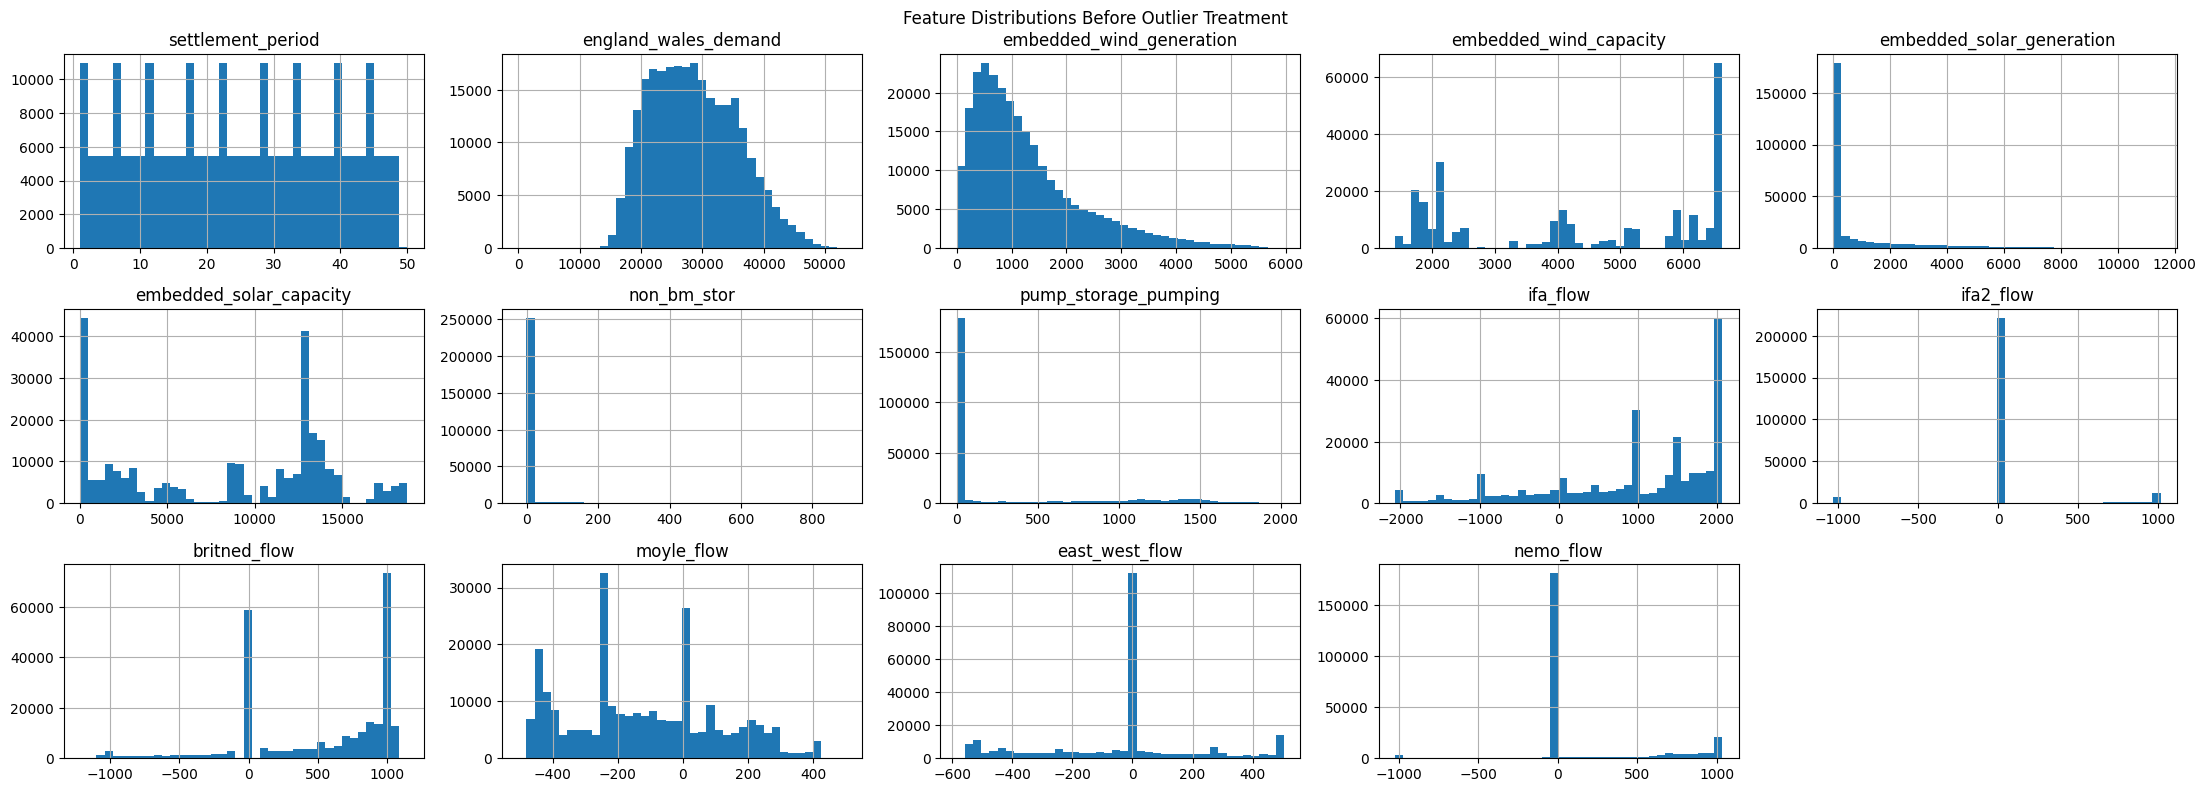

In [19]:
# === 5. Visualize Distributions Before Outlier Treatment ===
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].hist(bins=40, figsize=(22, 13), layout=(5, 5))
plt.suptitle("Feature Distributions Before Outlier Treatment")
plt.tight_layout()
plt.show()

In [20]:
# === 6. Outlier Capping (0.5th and 99.5th Percentiles) ===
for col in num_cols:
    lower = df[col].quantile(0.005)
    upper = df[col].quantile(0.995)
    df[col] = df[col].clip(lower=lower, upper=upper)
    print(f"{col}: capped to [{lower}, {upper}]")


settlement_period: capped to [1.0, 48.0]
england_wales_demand: capped to [15916.955, 47062.31500000009]
embedded_wind_generation: capped to [32.0, 5015.0]
embedded_wind_capacity: capped to [1403.0, 6622.0]
embedded_solar_generation: capped to [0.0, 8232.045000000013]
embedded_solar_capacity: capped to [0.0, 18720.0]
non_bm_stor: capped to [0.0, 303.0]
pump_storage_pumping: capped to [1.0, 1823.0]
ifa_flow: capped to [-2046.0, 2005.0]
ifa2_flow: capped to [-1029.0, 992.0]
britned_flow: capped to [-1026.0, 1059.0]
moyle_flow: capped to [-456.0, 401.0]
east_west_flow: capped to [-536.0, 504.0]
nemo_flow: capped to [-1021.0, 1019.0]


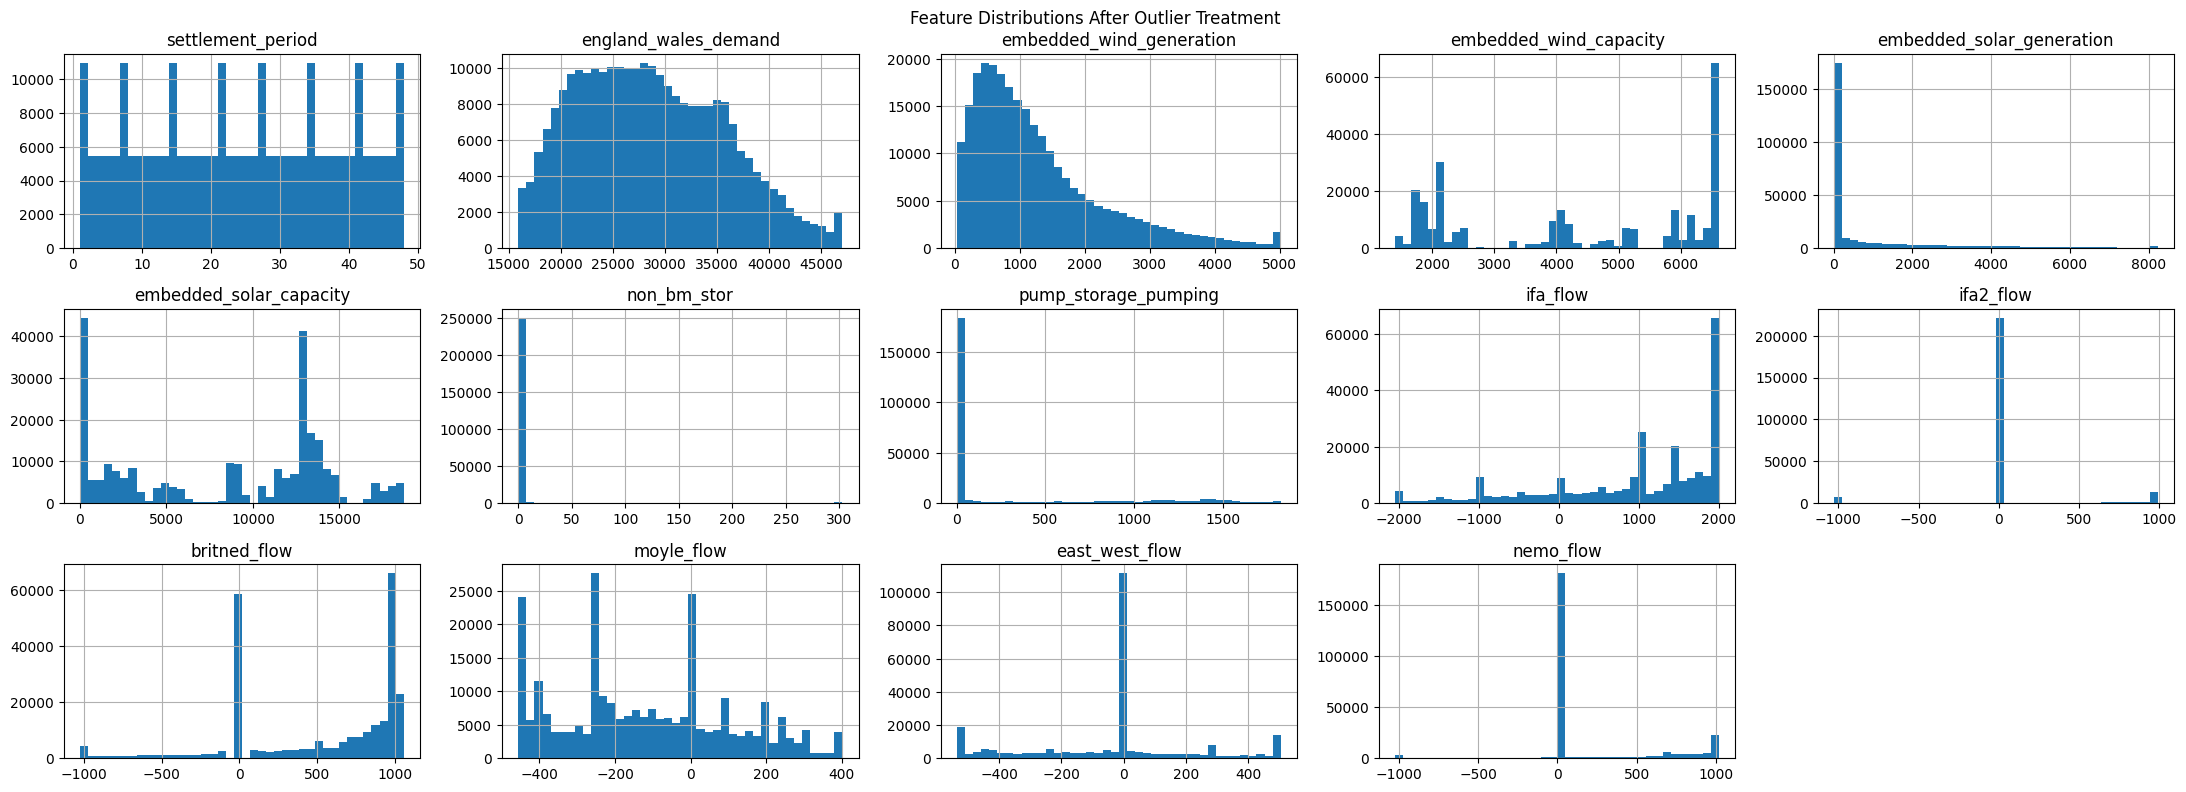

In [21]:
# Visualize Distributions After Outlier Treatment
df[num_cols].hist(bins=40, figsize=(22, 13), layout=(5, 5))
plt.suptitle("Feature Distributions After Outlier Treatment")
plt.tight_layout()
plt.show()

In [22]:
# === 7. Feature Engineering - Enhanced Temporal Features ===
# Per CloudAI Chapter 6: Time series requires rich temporal context
# Extract multiple temporal features for better model understanding

if 'settlement_date' in df.columns:
    # Ensure datetime format
    df['settlement_date'] = pd.to_datetime(df['settlement_date'], errors='coerce')
    
    # Create comprehensive temporal features
    print("Creating temporal features from settlement_date...")
    
    # Year-level features
    df['year'] = df['settlement_date'].dt.year
    df['quarter'] = df['settlement_date'].dt.quarter
    
    # Month and day features
    df['month'] = df['settlement_date'].dt.month
    df['day'] = df['settlement_date'].dt.day
    df['day_of_year'] = df['settlement_date'].dt.dayofyear
    df['week_of_year'] = df['settlement_date'].dt.isocalendar().week
    
    # Weekday features
    df['day_of_week'] = df['settlement_date'].dt.dayofweek  # 0=Monday, 6=Sunday
    df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)  # Saturday/Sunday
    
    # Hour feature from settlement_period (convert 1-48 to 0-23.5 hours)
    df['hour'] = (df['settlement_period'] - 1) * 0.5
    
    temporal_features = ['year', 'quarter', 'month', 'day', 'day_of_week', 
                        'day_of_year', 'week_of_year', 'is_weekend', 'hour']
    
    print(f"✓ Created {len(temporal_features)} temporal features: {temporal_features}")
    
    # Show statistics for key temporal features
    for feat in ['year', 'quarter', 'month', 'hour']:
        if feat in df.columns:
            valid_count = df[feat].notna().sum()
            print(f"  {feat}: range [{df[feat].min()} - {df[feat].max()}], {df[feat].nunique()} unique values, {valid_count:,} valid")
else:
    print("Warning: settlement_date column not found, skipping temporal feature engineering")


Creating temporal features from settlement_date...
✓ Created 9 temporal features: ['year', 'quarter', 'month', 'day', 'day_of_week', 'day_of_year', 'week_of_year', 'is_weekend', 'hour']
  year: range [2009 - 2024], 15 unique values, 262,992 valid
  quarter: range [1 - 4], 4 unique values, 262,992 valid
  month: range [1 - 12], 12 unique values, 262,992 valid
  hour: range [0.0 - 23.5], 48 unique values, 262,992 valid


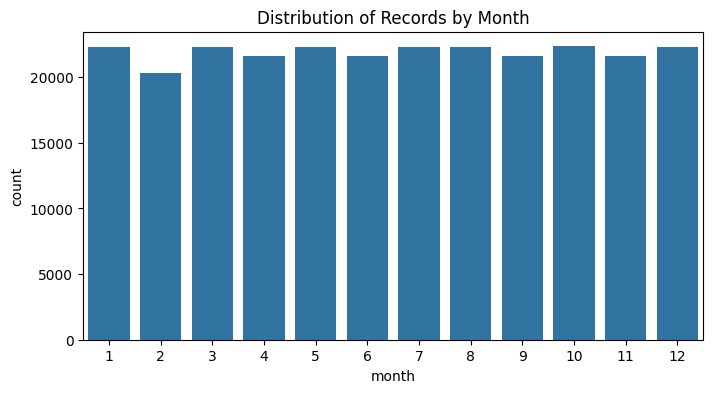

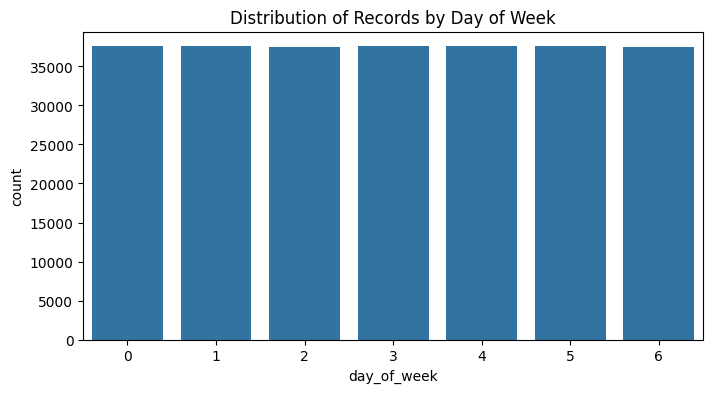

In [23]:
# Visualize new engineered features
if 'month' in df.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x='month', data=df)
    plt.title("Distribution of Records by Month")
    plt.show()
if 'day_of_week' in df.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x='day_of_week', data=df)
    plt.title("Distribution of Records by Day of Week")
    plt.show()

In [24]:
# === 8. Remove Remaining Highly Correlated Columns (>0.95) ===
# IMPORTANT: Protect temporal features even if highly correlated (needed per CloudAI Ch 6)
# Temporal features provide critical context for time series modeling

# Define temporal features to protect
temporal_cols = ['settlement_date', 'settlement_period', 'year', 'quarter', 'month', 
                'day', 'day_of_week', 'day_of_year', 'week_of_year', 'is_weekend', 'hour']

# Calculate correlation only for numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find highly correlated columns but EXCLUDE temporal features
to_drop_corr = [column for column in upper.columns 
                if any(upper[column] > 0.95) 
                and column.lower() not in [t.lower() for t in temporal_cols]]

df = df.drop(columns=to_drop_corr)
print(f"Dropped highly correlated columns (>0.95): {to_drop_corr}")
print(f"Protected temporal features: {[col for col in temporal_cols if col in df.columns]}")
print(f"Final column count: {len(df.columns)}")


Dropped highly correlated columns (>0.95): ['embedded_solar_capacity']
Protected temporal features: ['settlement_date', 'settlement_period', 'year', 'quarter', 'month', 'day', 'day_of_week', 'day_of_year', 'week_of_year', 'is_weekend', 'hour']
Final column count: 23


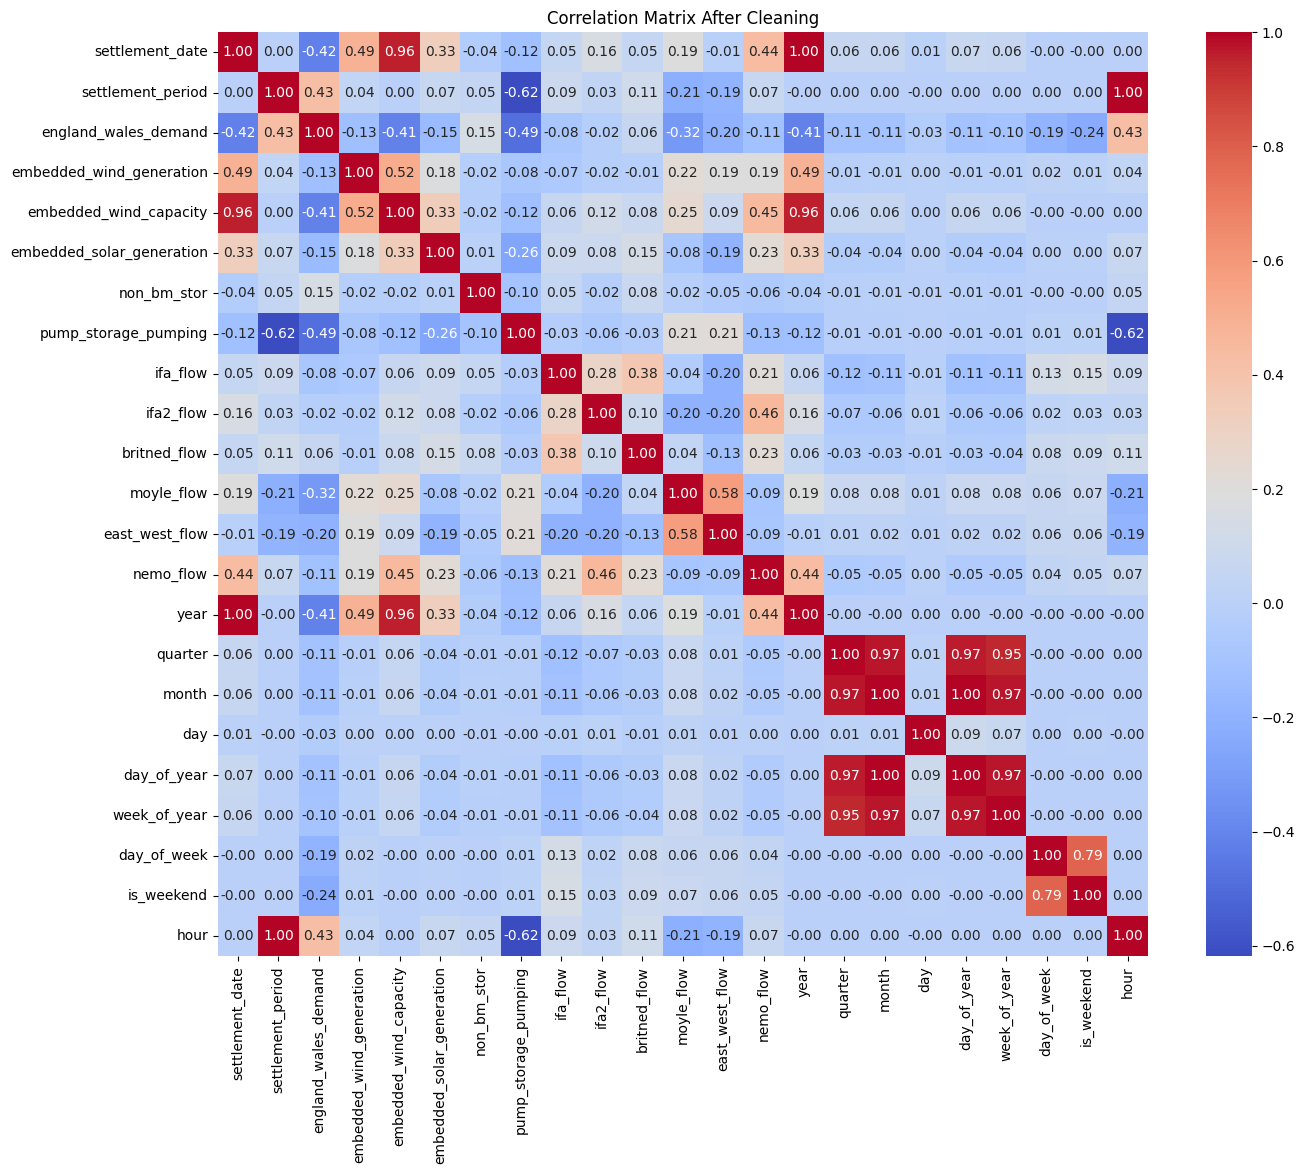

In [25]:
# Visualize correlation matrix (heatmap) after cleaning
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix After Cleaning')
plt.show()

In [26]:
# === 9. Final Verification and Save ===

print("="*70)
print("FINAL DATASET SUMMARY")
print("="*70)

# Show final shape and columns
print(f"\nShape: {df.shape[0]:,} rows × {df.shape[1]} columns")

# CRITICAL VERIFICATION: Check settlement_date completeness
if 'settlement_date' in df.columns:
    missing_dates = df['settlement_date'].isna().sum()
    print(f"\n✓ settlement_date missing: {missing_dates:,} ({missing_dates/len(df)*100:.2f}%)")
    if missing_dates > 0:
        print("❌ WARNING: Cannot save dataset with missing dates for time series!")
    else:
        # Show date range
        df['settlement_date'] = pd.to_datetime(df['settlement_date'], errors='coerce')
        print(f"✓ Date range: {df['settlement_date'].min()} to {df['settlement_date'].max()}")
        print(f"✓ Total unique dates: {df['settlement_date'].nunique():,}")

# Show missing values in ALL columns
missing_summary = df.isnull().sum()
if missing_summary.sum() > 0:
    print(f"\n⚠️  Remaining missing values:")
    for col, count in missing_summary[missing_summary > 0].items():
        print(f"   {col}: {count:,} ({count/len(df)*100:.2f}%)")
else:
    print("\n✓ No missing values in any column!")

# List temporal features
temporal_features = ['settlement_date', 'settlement_period', 'year', 'quarter', 'month', 
                    'day', 'day_of_week', 'day_of_year', 'week_of_year', 'is_weekend', 'hour']
present_temporal = [col for col in temporal_features if col in df.columns]
print(f"\n✓ Temporal features ({len(present_temporal)}): {present_temporal}")

# Verify temporal features are complete
for feat in ['year', 'quarter', 'month']:
    if feat in df.columns:
        missing_feat = df[feat].isna().sum()
        print(f"   {feat}: {df[feat].nunique()} unique values, {missing_feat:,} missing")

# List demand/generation features
demand_features = [col for col in df.columns if any(x in col.lower() for x in ['demand', 'generation', 'capacity', 'flow', 'stor', 'pump'])]
print(f"\n✓ Demand/generation features ({len(demand_features)}): {demand_features}")

# Save the cleaned dataset
output_path = '../Data/cleaned_and_augmented_electricity_data.csv'
df.to_csv(output_path, index=False)

print(f"\n{'='*70}")
print(f"✓ SAVED: {output_path}")
print(f"{'='*70}")

# Verify what was saved
print(f"\nColumns saved ({len(df.columns)}): {df.columns.tolist()}")


FINAL DATASET SUMMARY

Shape: 262,992 rows × 23 columns

✓ settlement_date missing: 0 (0.00%)
✓ Date range: 2009-01-01 00:00:00 to 2024-12-31 00:00:00
✓ Total unique dates: 5,479

✓ No missing values in any column!

✓ Temporal features (11): ['settlement_date', 'settlement_period', 'year', 'quarter', 'month', 'day', 'day_of_week', 'day_of_year', 'week_of_year', 'is_weekend', 'hour']
   year: 15 unique values, 0 missing
   quarter: 4 unique values, 0 missing
   month: 12 unique values, 0 missing

✓ Demand/generation features (12): ['england_wales_demand', 'embedded_wind_generation', 'embedded_wind_capacity', 'embedded_solar_generation', 'non_bm_stor', 'pump_storage_pumping', 'ifa_flow', 'ifa2_flow', 'britned_flow', 'moyle_flow', 'east_west_flow', 'nemo_flow']

✓ SAVED: ../Data/cleaned_and_augmented_electricity_data.csv

Columns saved (23): ['settlement_date', 'settlement_period', 'england_wales_demand', 'embedded_wind_generation', 'embedded_wind_capacity', 'embedded_solar_generation', '